## Analyziation of the steady state simulation results

### Residuals

In [1]:
# number of iterations
num_iterations = 10000

In [2]:
# loading libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

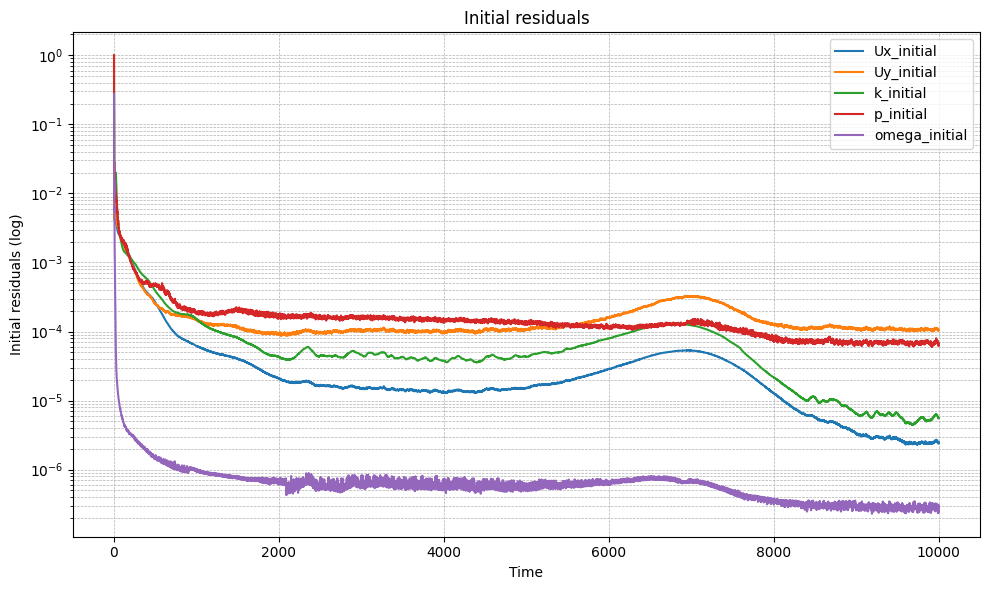

In [3]:
# column names 
colnames = [
    "Time", "U_solver", "Ux_initial", "Ux_final", "Ux_iters",
    "Uy_initial", "Uy_final", "Uy_iters", "U_converged",
    "k_solver", "k_initial", "k_final", "k_iters", "k_converged",
    "omega_solver", "omega_initial", "omega_final", "omega_iters", "omega_converged",
    "p_solver", "p_initial", "p_final", "p_iters", "p_converged"
]


# plotting 
plt.figure(figsize=(10, 6))
filepath = 'output/resultSteadyState/postProcessing/solverInfo/0/solverInfo.dat'
    
    # reading data
df = pd.read_csv(filepath, sep=r'\s+', skiprows=2, names=colnames)
    
plt.plot(df["Time"], df["Ux_initial"], label="Ux_initial")
plt.plot(df["Time"], df["Uy_initial"], label="Uy_initial")
plt.plot(df["Time"], df["k_initial"], label="k_initial")
plt.plot(df["Time"], df["p_initial"], label="p_initial")
plt.plot(df["Time"], df["omega_initial"], label="omega_initial")
    
plt.xlabel("Time")
plt.ylabel("Initial residuals (log)")
plt.title(f"Initial residuals")
plt.yscale('log')
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.legend()

# showing layout
plt.tight_layout()
plt.show()

## Analyziation of wall shear Stress

### Diagramm 

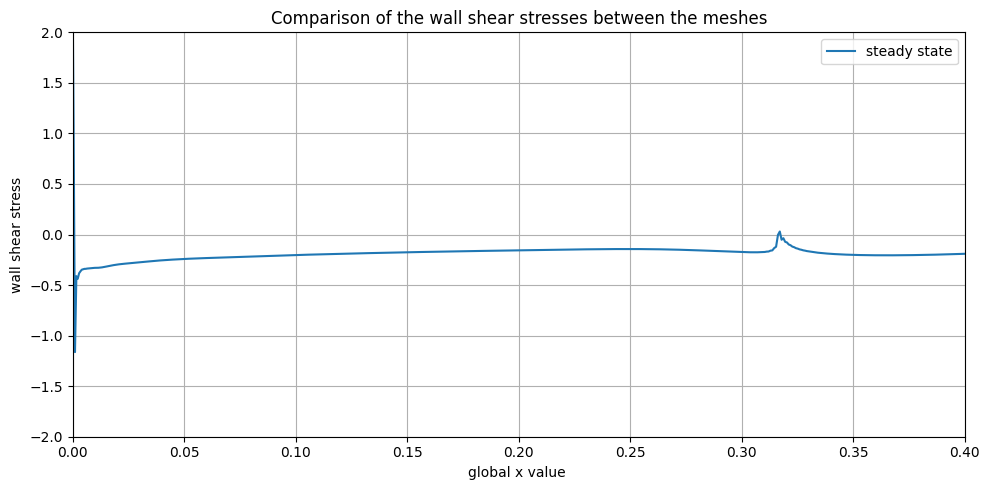

In [4]:
def process_file(file_path):
    data_pairs = []

    with open(file_path, 'r') as f:
        for line in f:
            if line.strip().startswith('#') or not line.strip():
                continue

            parts = line.strip().split()
            if len(parts) >= 9:
                x = float(parts[0])

                area = np.array([
                    float(parts[6]),
                    float(parts[7]),
                    float(parts[8])
                ])
                norm = np.linalg.norm(area)
                area_normalized = area / norm if norm != 0 else area

                ez = np.array([0, 0, 1])
                cross_prod = np.cross(area_normalized, ez)

                shear = np.array([
                    float(parts[3]),
                    float(parts[4]),
                    float(parts[5])
                ])

                scalar_product = np.dot(shear, cross_prod)
                data_pairs.append((x, scalar_product))

    # sorting by x
    data_pairs.sort(key=lambda pair: pair[0])
    return data_pairs


def plot_multiple_files_with_loop():
    plt.figure(figsize=(10, 5))
    
    file_path = ("output/resultSteadyState/postProcessing/samples/" + str(num_iterations) + "/wallShearStress_lowerWall.raw")

    data_pairs = process_file(file_path)
    x_vals = [pair[0] for pair in data_pairs]
    scalar_vals = [pair[1] for pair in data_pairs]

    plt.plot(x_vals, scalar_vals, label=f'steady state')

    plt.title('Comparison of the wall shear stresses between the meshes')
    plt.xlabel('global x value ')
    plt.ylabel('wall shear stress')
    plt.xlim(0, 0.4)
    plt.ylim(-2, 2)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

# execution
plot_multiple_files_with_loop()

### table of the wall shear stress at certain points to compare with experimental data

#### In the global coordinate system 

In [5]:
def process_file(file_path):
    data_pairs = []

    with open(file_path, 'r') as f:
        for line in f:
            if line.strip().startswith('#') or not line.strip():
                continue

            parts = line.strip().split()
            if len(parts) >= 9:
                x = float(parts[0])

                area = np.array([
                    float(parts[6]),
                    float(parts[7]),
                    float(parts[8])
                ])
                norm = np.linalg.norm(area)
                area_normalized = area / norm if norm != 0 else area

                ez = np.array([0, 0, 1])
                cross_prod = np.cross(area_normalized, ez)

                shear = np.array([
                    float(parts[3]),
                    float(parts[4]),
                    float(parts[5])
                ])

                scalar_product = np.dot(shear, cross_prod)
                data_pairs.append((x, scalar_product))

    return sorted(data_pairs, key=lambda pair: pair[0])

def interpolate_values_at_points(mesh_range, x_targets):
    results = {'x': x_targets}

    file_path = ("output/resultSteadyState/postProcessing/samples/" + str(num_iterations) + "/wallShearStress_lowerWall.raw")

    data_pairs = process_file(file_path)
    x_vals = [pair[0] for pair in data_pairs]
    scalar_vals = [pair[1] for pair in data_pairs]

        # Lineare Interpolation an gewünschten Stellen
    interpolated = np.interp(x_targets, x_vals, scalar_vals)

        # In Ergebnis-Tabelle einfügen
    results[f'wall shear stress in Pa'] = interpolated

    # Als DataFrame für schöne Ausgabe
    df = pd.DataFrame(results)
    return df

# Werte, an denen interpoliert werden soll
x_targets = np.array([0.082, 0.122, 0.162, 0.202, 0.242, 0.282, 0.386])
mesh_range = range(1, 6)  # Mesh 1 bis 5

# Interpolation ausführen und anzeigen
interpolation_table = interpolate_values_at_points(mesh_range, x_targets)
print(interpolation_table.to_string(index=False))


    x  wall shear stress in Pa
0.082                -0.215145
0.122                -0.189736
0.162                -0.170386
0.202                -0.155587
0.242                -0.143981
0.282                -0.157711
0.386                -0.199641


#### In the coordinate system of the ramp

In [6]:
def process_file(file_path):
    data_pairs = []

    with open(file_path, 'r') as f:
        for line in f:
            if line.strip().startswith('#') or not line.strip():
                continue

            parts = line.strip().split()
            if len(parts) >= 9:
                x = float(parts[0])

                area = np.array([
                    float(parts[6]),
                    float(parts[7]),
                    float(parts[8])
                ])
                norm = np.linalg.norm(area)
                area_normalized = area / norm if norm != 0 else area

                ez = np.array([0, 0, 1])
                cross_prod = np.cross(area_normalized, ez)

                shear = np.array([
                    float(parts[3]),
                    float(parts[4]),
                    float(parts[5])
                ])

                scalar_product = np.dot(shear, cross_prod)
                data_pairs.append((x, scalar_product))

    return sorted(data_pairs, key=lambda pair: pair[0])

def interpolate_values_at_points(mesh_range, x_targets):
    results = {
        'x_ramp': [0.082, 0.122, 0.162, 0.202, 0.242, 0.282, 0.386],
        'x_global': x_targets}
    

    file_path = ("output/resultSteadyState/postProcessing/samples/" + str(num_iterations) + "/wallShearStress_lowerWall.raw")

    data_pairs = process_file(file_path)
    x_vals = [pair[0] for pair in data_pairs]
    scalar_vals = [pair[1] for pair in data_pairs]

        # Lineare Interpolation an gewünschten Stellen
    interpolated = np.interp(x_targets, x_vals, scalar_vals)

        # In Ergebnis-Tabelle einfügen
    results[f'wall shear stress in Pa'] = interpolated

    # Als DataFrame für schöne Ausgabe
    df = pd.DataFrame(results)
    return df

# Werte, an denen interpoliert werden soll
x_targets = np.array([np.cos(np.radians(20))*0.082, np.cos(np.radians(20))*0.122, np.cos(np.radians(20))*0.162, np.cos(np.radians(20))*0.202, np.cos(np.radians(20))*0.242, np.cos(np.radians(20))*0.282, 0.386])
mesh_range = range(1, 6)  # Mesh 1 bis 5

# Interpolation ausführen und anzeigen
interpolation_table = interpolate_values_at_points(mesh_range, x_targets)
print(interpolation_table.to_string(index=False))

 x_ramp  x_global  wall shear stress in Pa
  0.082  0.077055                -0.219060
  0.122  0.114642                -0.193946
  0.162  0.152230                -0.174557
  0.202  0.189818                -0.159871
  0.242  0.227406                -0.147134
  0.282  0.264993                -0.146830
  0.386  0.386000                -0.199641


### Recirculation after 10000 iterations 

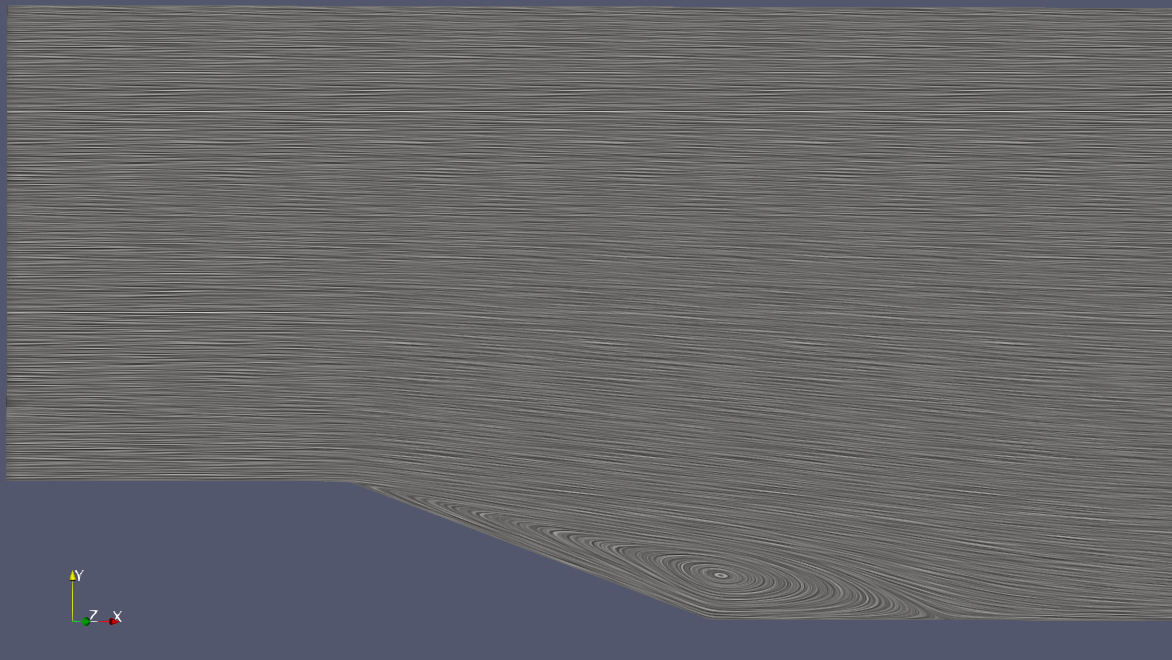

### Mesh with 488280 cells built around 3 cells for the jet-block 

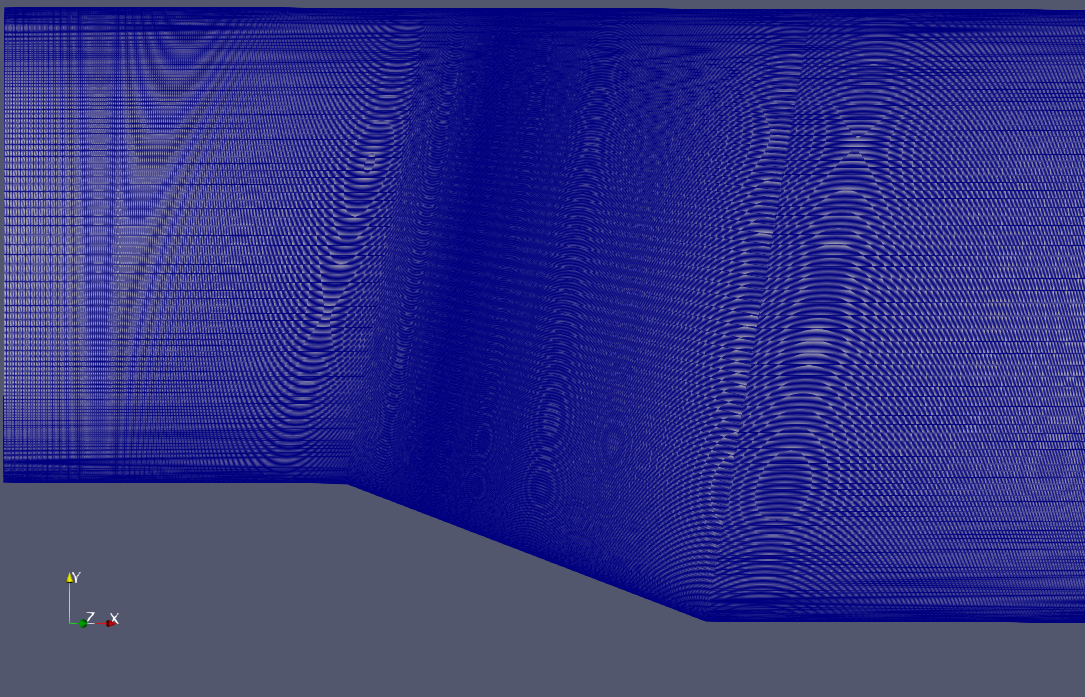